<a href="https://colab.research.google.com/github/SourGum73/DigitalSkola-Homework_Statistic/blob/main/Hypothesis%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Homework 4 - Statistic/cust_seg.csv')
#df.sort_values(by='custid', inplace=True)
df

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2
...,...,...,...,...,...,...,...,...,...,...
195,31,1,2,2,2,1,55,59,62.4,64.9
196,145,1,4,2,1,3,42,46,45.6,50.6
197,187,1,4,2,2,1,57,41,68.4,45.1
198,118,1,4,2,1,1,55,62,69.6,68.2


## EDA

**A. basic Functionr (info and describe)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [ ]:
# Notes: The data is already in numerical form, so it doesn't need to be changed again.

In [ ]:
df['custid'].unique()

array([ 70, 121,  86, 141, 172, 113,  50,  11,  84,  48,  75,  60,  95,
       104,  38, 115,  76, 195, 114,  85, 167, 143,  41,  20,  12,  53,
       154, 178, 196,  29, 126, 103, 192, 150, 199, 144, 200,  80,  16,
       153, 176, 177, 168,  40,  62, 169,  49, 136, 189,   7,  27, 128,
        21, 183, 132,  15,  67,  22, 185,   9, 181, 170, 134, 108, 197,
       140, 171, 107,  81,  18, 155,  97,  68, 157,  56,   5, 159, 123,
       164,  14, 127, 165, 174,   3,  58, 146, 102, 117, 133,  94,  24,
       149,  82,   8, 129, 173,  57, 100,   1, 194,  88,  99,  47, 120,
       166,  65, 101,  89,  54, 180, 162,   4, 131, 125,  34, 106, 130,
        93, 163,  37,  35,  87,  73, 151,  44, 152, 105,  28,  91,  45,
       116,  33,  66,  72,  77,  61, 190,  42,   2,  55,  19,  90, 142,
        17, 122, 191,  83, 182,   6,  46,  43,  96, 138,  10,  71, 139,
       110, 148, 109,  39, 147,  74, 198, 161, 112,  69, 156, 111, 186,
        98, 119,  13,  51,  26,  36, 135,  59,  78,  64,  63,  7

In [ ]:
df.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


In [ ]:
# Notes: The table shows the basic statistical values of the file 'cust_seg.csv' for each column, such as:
# mean, standard deviation, minimum value, quartiles, and maximum value.

**B. Histogram**

Histogram for Gender Variable

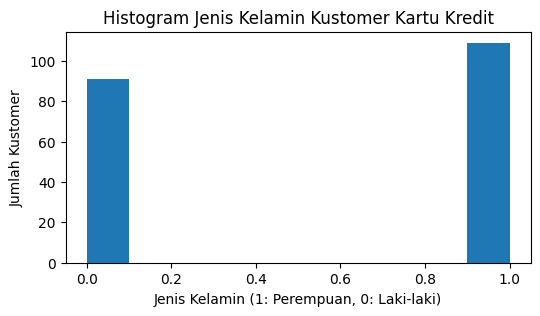

sex
1    109
0     91
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(6, 3))
##see the difference in credit card usage distribution based on gender
plt.hist(df['sex'])
plt.xlabel('Jenis Kelamin (1: Perempuan, 0: Laki-laki)')
plt.ylabel('Jumlah Kustomer')
plt.title('Histogram Jenis Kelamin Kustomer Kartu Kredit')
plt.show()
df['sex'].value_counts()

In [ ]:
##Notes:
#The provided information indicates that there are more females (category 1) than males (category 0) in the dataset.
#The exact count is 109 females and 91 males.

Histogram for Akuisisi

AqChannel
4    145
1     24
3     20
2     11
Name: count, dtype: int64

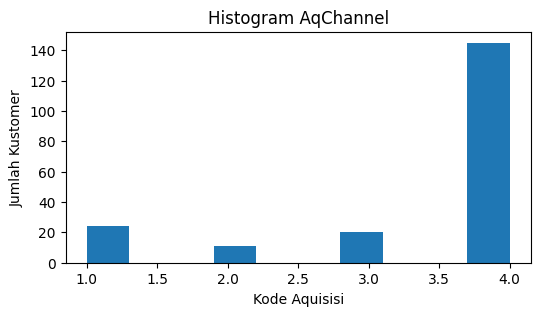

In [ ]:
##To see the difference in credit card usage distribution based on acquisition type:plt.figure(figsize=(6, 3))
plt.hist(df['AqChannel'])
plt.xlabel('Kode Aquisisi')
plt.ylabel('Jumlah Kustomer')
plt.title('Histogram AqChannel')
df['AqChannel'].value_counts()

In [ ]:
##Notes:
#The data shows that acquisition code 4 was used the most in the credit card campaign.
#The exact count is:e Akuisisi 1 : 24, Akuisisi 2, Akuisisi 3 : 20, dan Akuisisi 4: 145

Histogram for Customer Region

region
2    95
3    58
1    47
Name: count, dtype: int64

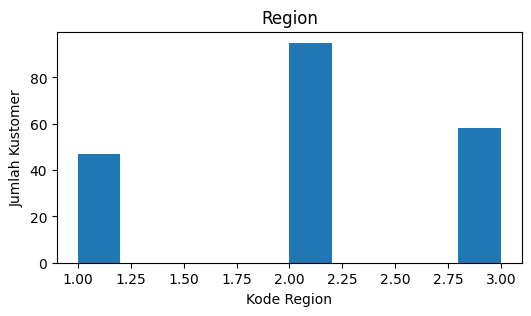

In [ ]:
##see the difference in credit card usage distribution based on residential area
plt.figure(figsize=(6, 3))
plt.hist(df['region'])
plt.xlabel('Kode Region')
plt.ylabel('Jumlah Kustomer')
plt.title('Region')
df['region'].value_counts()

In [ ]:
##Notes:
#The data shows that the most customers who participated in the credit card campaign were from Region 2.
#The exact count is: region 1 : 47, Region 2 : 95, dan Region 3: 58

Histogram for Customer Category

segment
2    105
3     50
1     45
Name: count, dtype: int64

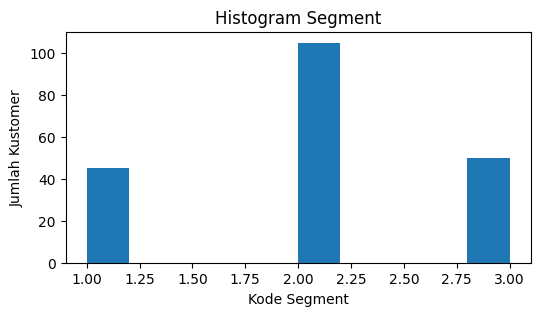

In [ ]:
plt.figure(figsize=(6, 3))
plt.hist(df['segment'])
plt.xlabel('Kode Segment')
plt.ylabel('Jumlah Kustomer')
plt.title('Histogram Segment')
df['segment'].value_counts()

In [ ]:
##Notes:
#The data shows that most customers who participated in the credit card campaign were from Segment 2.
#The exact count is: Segmen 1 : 45, Segmen 2: 105,  segmen 3 : 50

**Histogram for Credit Card Usage**

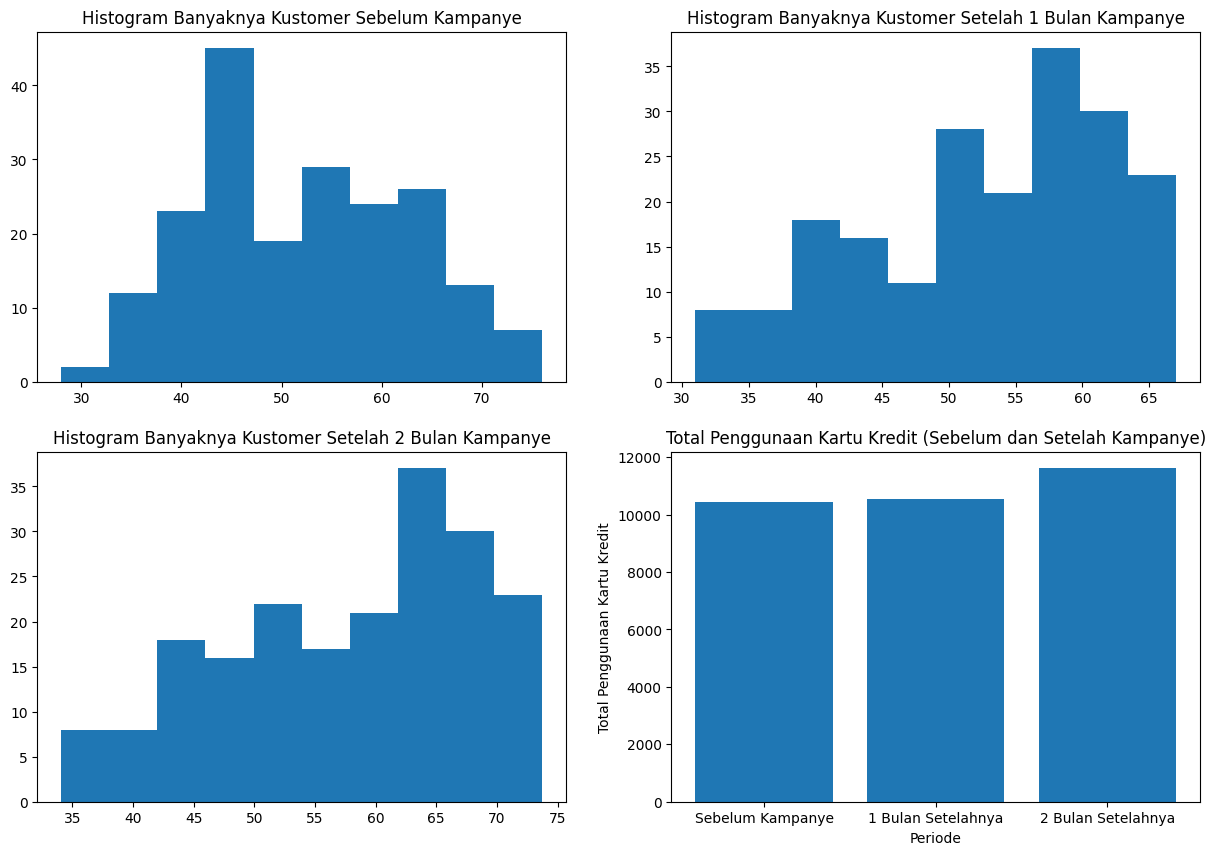

Total Pre Usage: 10446
Total After 1 Month Usage: 10555
Total After 2 Month Usage: 11610.5


In [ ]:
plt.figure(figsize=(15, 10))

#Before Campaign
plt.subplot(2, 2, 1)
plt.hist(df['pre_usage'])
plt.title('Histogram Banyaknya Kustomer Sebelum Kampanye')

#1-Month Post-Campaign
plt.subplot(2, 2, 2)
plt.hist(df['Post_usage_1month'])
plt.title('Histogram Banyaknya Kustomer Setelah 1 Bulan Kampanye')

#2-Month Post-Campaign
plt.subplot(2, 2, 3)
plt.hist(df['post_usage_2ndmonth'])
plt.title('Histogram Banyaknya Kustomer Setelah 2 Bulan Kampanye')

#Effect of the campaign
total_pre_usage = df['pre_usage'].sum()
total_Post_usage_1month = df['Post_usage_1month'].sum()
total_Post_usage_2month = df['post_usage_2ndmonth'].sum()

plt.subplot(2, 2, 4)
data = [total_pre_usage, total_Post_usage_1month, total_Post_usage_2month]
labels = ['Sebelum Kampanye', '1 Bulan Setelahnya', '2 Bulan Setelahnya']
plt.bar(labels, data)
plt.xlabel('Periode')
plt.ylabel('Total Penggunaan Kartu Kredit')
plt.title('Total Penggunaan Kartu Kredit (Sebelum dan Setelah Kampanye)')
plt.show()

print("Total Pre Usage:", total_pre_usage)
print("Total After 1 Month Usage:", total_Post_usage_1month)
print("Total After 2 Month Usage:", total_Post_usage_2month)

In [ ]:
##Notes:
#The data shows an increase in credit card usage after the campaign.
#However, this data alone cannot prove that the campaign was successful. Further analysis is needed to determine the true impact of the campaign.

## Hypothesis Testing to Determine the Success of the Campaign.

**A.Examine the hypothesis that credit card usage differs between the period before and one month subsequent to the campaign.**

In [ ]:
##Hypothesis Definition
#H0 (Null Hypothesis): There is no statistically significant difference in credit card usage between before and one month after the campaign.
#H1 (Alternative Hypothesis): There is a statistically significant difference in credit card usage between before and one month after the campaign.

##Hypothesis Testing
pre_usage = df['pre_usage']
Post_usage_1month = df['Post_usage_1month']

# Perform t-test for related samples
t_statistic, p_value = stats.ttest_rel(pre_usage, Post_usage_1month)
print("Nilai p = ", p_value)

# Interpret results
if p_value < 0.05:
    print("p-value < 0.05")
    print("Hasil Uji Hipotesis:Tolak H0")
    print("Kesimpulan: Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara sebelum kampanye dan satu bulan setelah kampanye")
else:
    print("p-value >= 0.05")
    print("Hasil Uji Hipotesis: Gagal tolak H0.")
    print("Kesimpulan: Tidak terdapat perbedaan signifikan dalam penggunaan kartu kredit antara sebelum kampanye dan satu bulan setelah kampanye.")

Nilai p =  0.3868186820914985
p-value >= 0.05
Hasil Uji Hipotesis: Gagal tolak H0.
Kesimpulan: Tidak terdapat perbedaan signifikan dalam penggunaan kartu kredit antara sebelum kampanye dan satu bulan setelah kampanye.


**B. Examine the hypothesis that credit card usage differs between the period before and Two month subsequent to the campaign.**

In [ ]:
##Hypothesis Definition
#H0 (Null Hypothesis): There is no statistically significant difference in credit card usage between before and two month after the campaign.
#H1 (Alternative Hypothesis): There is a statistically significant difference in credit card usage between before and two month after the campaign.

##Hypothesis Testing
pre_usage = df['pre_usage']
Post_usage_2month = df['post_usage_2ndmonth']

t_statistic, p_value = stats.ttest_rel(pre_usage, Post_usage_2month)
print("Nilai p = ", p_value)

# Interpret results
if p_value < 0.05:
    print("p-value < 0.05")
    print("Hasil Uji Hipotesis: Tolak H0")
    print("Kesimpulan: Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara sebelum kampanye dan satu bulan setelah kampanye")
else:
    print("p-value >= 0.05")
    print("Hasil Uji Hipotesis: Gagal tolak H0.")
    print("Kesimpulan: Tidak terdapat perbedaan signifikan dalam penggunaan kartu kredit antara sebelum kampanye dan satu bulan setelah kampanye.")

Nilai p =  4.295733828012836e-16
p-value < 0.05
Hasil Uji Hipotesis: Tolak H0
Kesimpulan: Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara sebelum kampanye dan satu bulan setelah kampanye


In [ ]:
##Kesimpulan :
#It is difficult to draw a definitive conclusion about the overall effectiveness of the credit card campaign based on these two hypothesis test results alone.This is because:
#1#The differing results between 1 month and 2 months suggest that the campaign's effect may develop over time.
#2#It is possible that the campaign had no immediate effect on credit card usage within 1 month, but may have had a positive effect after 2 months.
## Further analysis and investigation are needed to fully understand the impact of the campaign and to determine its overall effectiveness.

## Hypothesis Testing to Identify Differences in Credit Card Usage Between Male and Female Categories Post-Campaign.

**A.  Test the hypothesis that there is a difference in credit card usage between men and women 1 month after the campaign.**

In [ ]:
##Hypothesis Definition
#H0 (Null Hypothesis): There is no statistically significant difference in credit card usage between men and women 1 month after the campaign.
#H1 (Alternative Hypothesis): There is a statistically significant difference in credit card usage between men and women 1 month after the campaign.

##Hypothesis Testing
male_usage_1 = df[df['sex'] == 0]['Post_usage_1month']
female_usage_1 = df[df['sex'] == 1]['Post_usage_1month']

t_statistic, p_value = stats.ttest_ind(male_usage_1, female_usage_1)
print("Nilai p = ", p_value)

## Interpretation of Results:
if p_value < 0.05:
    print("p-value < 0.05")
    print("Hasil Uji Hipotesis: Tolak H0. ")
    print("Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan setelah 1 bulan kampanye.")

    # To find the gender of users with the highest credit card usage:
    if male_usage_1.mean() > female_usage_1.mean():
        print("Laki-laki memiliki penggunaan kartu kredit yang lebih tinggi.")
    else:
        print("Perempuan memiliki penggunaan kartu kredit yang lebih tinggi.")
else:
    print("p-value >= 0.05")
    print("Hasil Uji Hipotesis: Gagal tolak H0.")
    print("Tidak terdapat perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan setelah 1 bulan kampanye (p-value >= 0.05).")


Nilai p =  0.00024625461203549315
p-value < 0.05
Hasil Uji Hipotesis: Tolak H0. 
Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan setelah 1 bulan kampanye.
Perempuan memiliki penggunaan kartu kredit yang lebih tinggi.


**B. Test the hypothesis that there is a difference in credit card usage between men and women 2 month after the campaign.**

In [ ]:
#Hypothesis Definition
#H0 (Null Hypothesis): There is no statistically significant difference in credit card usage between men and women 2 months after the campaign.
#H1 (Alternative Hypothesis): There is a statistically significant difference in credit card usage between men and women 2 months after the campaign.

##Hypothesis Testing
Post_usage_1month
male_usage_1 = df[df['sex'] == 0]['post_usage_2ndmonth']
female_usage_1 = df[df['sex'] == 1]['post_usage_2ndmonth']

t_statistic, p_value = stats.ttest_ind(male_usage_1, female_usage_1)
print("Nilai p = ", p_value)

## Interpretation of Results:
if p_value < 0.05:
    print("p-value < 0.05")
    print("Hasil Uji Hipotesis: Tolak H0. ")
    print("Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan setelah 2 bulan kampanye.")

    # To find the gender of users with the highest credit card usage:
    if male_usage_1.mean() > female_usage_1.mean():
        print("Laki-laki memiliki penggunaan kartu kredit yang lebih tinggi.")
    else:
        print("Perempuan memiliki penggunaan kartu kredit yang lebih tinggi.")
else:
    print("p-value >= 0.05")
    print("Hasil Uji Hipotesis: Gagal tolak H0.")
    print("Tidak terdapat perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan setelah 2 bulan kampanye.")


Nilai p =  0.0002462546120354815
p-value < 0.05
Hasil Uji Hipotesis: Tolak H0. 
Terdapat perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan setelah 2 bulan kampanye.
Perempuan memiliki penggunaan kartu kredit yang lebih tinggi.


In [ ]:
## Conclusion:
# There is a statistically significant difference in credit card usage between men and women both one month and two months after the campaign.
# This is evident from the p-values being less than 0.05 in both hypothesis tests.
# Women have higher credit card usage compared to men at both time points analyzed, based on the provided data.